In [1]:
import pandas as pd

In [2]:
# load the df's
invoice_df = pd.read_csv('/Users/bellayap/Downloads/fct_invoice.csv')
customers_df = pd.read_json('/Users/bellayap/Downloads/dim_customer.json')

# first few rows to see structure of df
invoice_df.head(), customers_df.head()

(  invoice_no  customer_id  category  quantity    price payment_method  \
 0    I138884          229  Clothing         5  1500.40    Credit Card   
 1    I317333         3433     Shoes         3  1800.51     Debit Card   
 2    I127801          644  Clothing         1   300.08           Cash   
 3    I173702         4900     Shoes         5  3000.85    Credit Card   
 4    I337046         1089     Books         4    60.60           Cash   
 
   invoice_date   shopping_mall  
 0     5/8/2022          Kanyon  
 1   12/12/2021  Forum Istanbul  
 2    9/11/2021       Metrocity  
 3   16/05/2021    Metropol AVM  
 4   24/10/2021          Kanyon  ,
     age first_name gender  id last_name
 0  48.0   Nicholas      M   0    Flores
 1   NaN    Jeffery      M   1      Rowe
 2  57.0     Alexis      F   2    Benton
 3  73.0        Amy      F   3   Johnson
 4  20.0      David      M   4     Moore)

In [7]:
# Easy 1 How many unique customers are in the dataset?

invoice_df['customer_id'].nunique()

5191

In [6]:
# Easy 2a What are the different categories of products available?

invoice_df['category'].unique().tolist()

['Clothing',
 'Shoes',
 'Books',
 'Cosmetics',
 'Food & Beverage',
 'Toys',
 'Technology',
 'Souvenir']

In [8]:
#Easy 2b How many unique categories are there?

invoice_df['category'].nunique()

8

In [54]:
#Easy 3a Which payment method is the most popular? 

invoice_df['payment_method'].mode()

0    Cash
Name: payment_method, dtype: object

In [58]:
#Easy 3b How many times was it used?

s = invoice_df['payment_method'] == 'Cash'

s.sum()

44447

In [17]:
invoice_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [19]:
customers_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [35]:
# Medium 1 What are the three most popular categories, by total sales?

invoice_df.groupby('category')['price'].sum().nlargest(3)

category
Clothing      31075684.64
Shoes         18135336.89
Technology    15772050.00
Name: price, dtype: float64

In [29]:
# merge the 2 df's

df_merged = pd.concat([invoice_df, customers_df], ignore_index=True, sort=False)

In [30]:
df_merged

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name
0,I138884,229.0,Clothing,5.0,1500.40,Credit Card,5/8/2022,Kanyon,NaN,NaN,NaN,NaN,NaN
1,I317333,3433.0,Shoes,3.0,1800.51,Debit Card,12/12/2021,Forum Istanbul,NaN,NaN,NaN,NaN,NaN
2,I127801,644.0,Clothing,1.0,300.08,Cash,9/11/2021,Metrocity,NaN,NaN,NaN,NaN,NaN
3,I173702,4900.0,Shoes,5.0,3000.85,Credit Card,16/05/2021,Metropol AVM,NaN,NaN,NaN,NaN,NaN
4,I337046,1089.0,Books,4.0,60.60,Cash,24/10/2021,Kanyon,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arthur,M,9428.0,Harris
104644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,David,M,9494.0,Roy
104645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,Thomas,M,10350.0,Turner
104646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,April,F,10587.0,Sanchez


In [63]:
# Medium 2  What are the total sales attributed to customers over the age of 45?

over_45 = df_merged['age'] > 45

df_merged.groupby([over_45])['price'].sum()

age
False    46180812.64
True     22370553.27
Name: price, dtype: float64

<Axes: title={'center': 'Monthly Invoice Count (Seasonal Trends)'}, xlabel='Invoice Month', ylabel='Number of Invoices'>

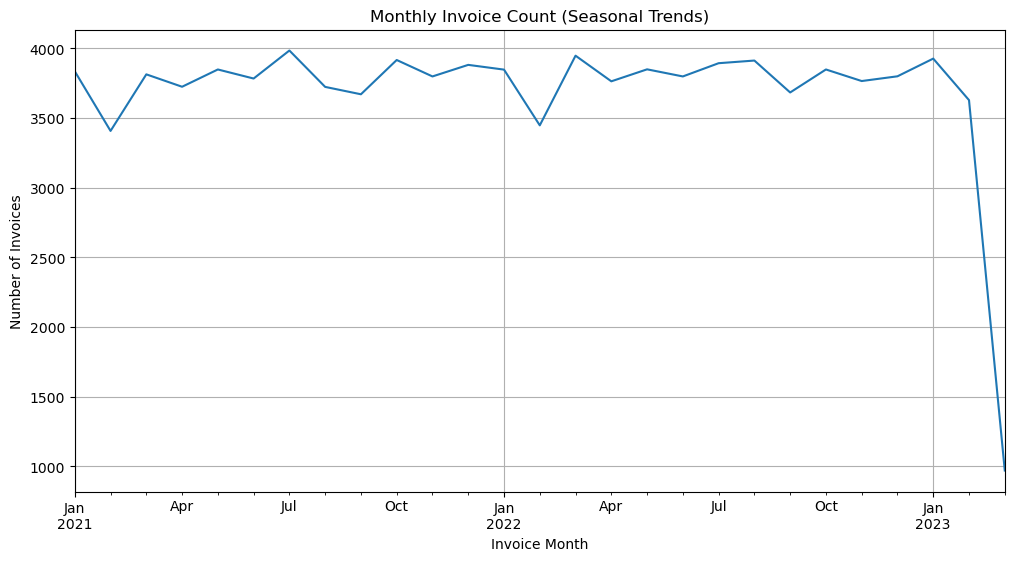

In [64]:
# Medium 3a How is the data distributed across different invoice dates? 
# Medium 3b Are there any seasonal trends or patterns? (Use a graph for this.)

df_merged['invoice_date'] = pd.to_datetime(df_merged['invoice_date'], dayfirst=True, errors='coerce')

df_merged.set_index('invoice_date').resample('ME').size().plot(
    kind='line',
    figsize=(12,6),
    title='Monthly Invoice Count (Seasonal Trends)',
    xlabel='Invoice Month',
    ylabel='Number of Invoices',
    grid=True
)

In [66]:
# Hard Create a pivot table showing the breakdown of sales across these dimensions
# in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

def get_age_group(age):
    if pd.isnull(age):
        return None
    group_start = int(age // 10) * 10
    return f"{group_start}-{group_start + 9}"

df_merged['age_group'] = df_merged['age'].apply(get_age_group)

pivot_table = pd.pivot_table(
    df_merged,
    values='price',         
    index='category',      
    columns='age_group',    
    aggfunc='sum',          
    fill_value=0,           
    observed=False         
)

pivot_table

age_group,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,3469.35,21619.05,22997.70,23361.30,20664.60,21513.00,15437.85,7575.00
Clothing,518238.16,2818351.36,3074919.76,3066817.60,2803647.44,2910776.00,2117064.40,1228827.60
Cosmetics,29681.80,165079.60,198054.86,181343.60,160932.28,176627.04,114132.62,71236.32
Food & Beverage,3645.31,20428.38,23744.20,24460.71,19999.52,22190.89,14968.26,8561.51
Shoes,274277.69,1630061.72,1912141.62,1889335.16,1591650.84,1618058.32,1210542.89,708200.60
Souvenir,3296.13,15295.92,17548.08,17759.22,15084.78,15331.11,10592.19,6545.34
Technology,287700.00,1426950.00,1669500.00,1630650.00,1220100.00,1529850.00,977550.00,548100.00
Toys,17203.20,102466.56,115297.28,106910.72,94115.84,100244.48,74475.52,43043.84
